# Evaluate CNV Calling

This notebook produces various plots for comparing CNV calls and coverage between illumina and long-read (i.e., Nanopore) WGS data.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

## Compare coverage

In [11]:
MIN_COVERAGE = -100

nanopore_coverage = pd.read_csv("../../data/COLO320-DM/nanopore/nanopore_cnv_out/winnowmap_mapping.sorted.cnr", sep='\t')
illumina_coverage = pd.read_csv("../../data/COLO320-DM/illumina/illumina_cnv_out/COLO320DM.sort.rmdup.cnr", sep='\t')

nanopore_coverage.loc[nanopore_coverage['log2'] < MIN_COVERAGE, 'log2'] = MIN_COVERAGE
illumina_coverage.loc[illumina_coverage['log2'] < MIN_COVERAGE, 'log2'] = MIN_COVERAGE


In [12]:
nanopore_coverage.head(5)

,chromosome,start,end,gene,depth,log2,weight
0,chr1,11874,29370,"DDX11L1,MIR6859-1,MIR6859-2,MIR6859-3,MIR6859-...",0.000000,-18.91860,0.0001
1,chr1,30366,30503,"MIR1302-10,MIR1302-11,MIR1302-2,MIR1302-9",0.000000,-19.16240,0.0001
2,chr1,34611,36081,"FAM138A,FAM138C,FAM138F",0.000000,-18.89910,0.0001
3,chr1,69091,70008,OR4F5,0.000000,-19.31650,0.0001
4,chr1,134773,140566,LOC729737,0.088037,-1.85084,0.0001


/Users/mgjones/miniconda3/envs/long-read-sv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


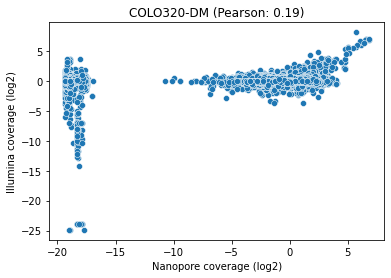

In [13]:
corr = stats.pearsonr(nanopore_coverage['log2'].values, illumina_coverage['log2'].values)[0]

sns.scatterplot(nanopore_coverage['log2'].values, illumina_coverage['log2'].values)
plt.xlabel("Nanopore coverage (log2)")
plt.ylabel("Illumina coverage (log2)")
plt.title(f"COLO320-DM (Pearson: {round(corr, 2)})")
plt.show()